In [1]:
1# Importing necessary packages
import pandas as pd # python's data handling spackage
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

##### Loading data.

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1

data = pd.read_csv("Houseprice_data_scaled.csv")


In [3]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]

In [4]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

###### Linear Regression

In [5]:
# Importing models
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs


,1
0,
intercept,-3.06336e-11
LotArea,0.0789996
OverallQual,0.214395
OverallCond,0.0964787
YearBuilt,0.160799
YearRemodAdd,0.0253524
BsmtFinSF1,0.0914664
BsmtUnfSF,-0.0330798
TotalBsmtSF,0.138199


In [8]:
# calculate the mse of the regression
pred = lr.predict(X_val)
mse_original = mse(y_val, pred)
print(mse_original)

0.11702499460121657


###### Ridge Regression

In [9]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [10]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11703284346091362
0.11710797319753004
0.11723952924901127
0.11741457158889522
0.11762384068711465
0.11825709631198025
0.11900057469147934
0.12254649996292957
0.1307359968074713


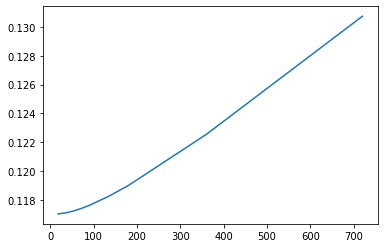

In [11]:
plt.plot(alphas, mses)

###### Lasso

In [12]:
# Import Lasso
from sklearn.linear_model import Lasso

In [13]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs


,1
0,
intercept,-1.25303e-11
LotArea,0.0443042
OverallQual,0.298079
OverallCond,0
YearBuilt,0.0520907
YearRemodAdd,0.0644712
BsmtFinSF1,0.115875
BsmtUnfSF,-0
TotalBsmtSF,0.10312


###### Lasso with different levels of alpha and its mse

In [15]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.11654751909608793
0.11682687945311092
0.11803348353132033
0.12012836764958998
0.12301536903084044
0.13178576395045632
0.14017194584483775


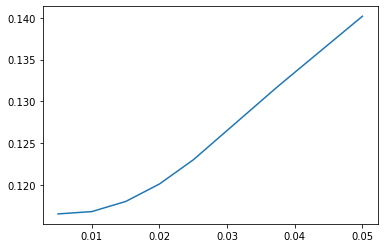

In [16]:
plt.plot(alphas, mses)

###  Data with Additional Features (Cleaning Method #1)

In [17]:
# 4 additional features are added to the data: 
# LotFrontage, LotShape which is broken down into 3 dummy variables: IR1, IR2, IR3, Yr Sold, SaleCondition (5 dummies)
url = 'https://drive.google.com/file/d/160U3Nw_KwWM2gz5bzFdBi96KIHklPWKH/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_add = pd.read_csv(path)

data_add.head(10)


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,LotFrontage,IR1,IR2,IR3,YrSold,Abnorml,AdjLand,Alloca,Family,Partial
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,65.0,0,0,0,2008,0,0,0,0,0
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,80.0,0,0,0,2007,0,0,0,0,0
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,68.0,1,0,0,2008,0,0,0,0,0
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,60.0,1,0,0,2006,1,0,0,0,0
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,84.0,1,0,0,2008,0,0,0,0,0
5,0.428835,-0.797802,-0.512407,0.704761,0.488205,0.657168,-1.131197,-0.626226,-0.969192,0.531738,...,85.0,1,0,0,2009,0,0,0,0,0
6,-0.018316,1.378022,-0.512407,1.072260,0.972641,2.110771,-0.560619,1.506244,1.431031,-0.789421,...,75.0,0,0,0,2007,0,0,0,0,0
7,0.014741,0.652747,0.388309,0.036583,-0.577556,0.946976,-0.788399,0.118940,-0.137934,1.505100,...,NaN,1,0,0,2009,0,0,0,0,0
8,-0.458034,0.652747,-0.512407,-1.366592,-1.691761,-1.013221,0.871465,-0.252445,-0.365127,0.965900,...,51.0,0,0,0,2008,1,0,0,0,0
9,-0.313828,-0.797802,0.388309,-1.099321,-1.691761,0.928720,-0.959798,-0.158999,-0.218120,-0.789421,...,50.0,0,0,0,2008,0,0,0,0,0


In [18]:
#Data cleaning for LotFrontage
#First method: replace missing value with median

frontage_median = data_add['LotFrontage'].median()
data_add['LotFrontage'] = data_add['LotFrontage'].fillna(frontage_median)

#Scale LotFrontage, IR1, IR2, IR3, YrSold, and the 5 dummies for SaleConditon: Abnormal, AdjLand, Alloca, Family, Partial

for col in ['LotFrontage', 'IR1', 'IR2', 'IR3', 'YrSold', 'Abnorml', 'AdjLand', 'Alloca', 'Family','Partial']:
    data_add[col] = (data_add[col] - data_add[col].mean())/data_add[col].std()

data_add.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,LotFrontage,IR1,IR2,IR3,YrSold,Abnorml,AdjLand,Alloca,Family,Partial
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.188430,-0.702978,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,0.535803,-0.702978,-0.163789,-0.071994,-0.603227,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.043584,1.422031,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.429841,1.422031,-0.163789,-0.071994,-1.362613,3.824837,-0.06436,-0.089272,-0.126756,-0.301233
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,0.728932,1.422031,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
5,0.428835,-0.797802,-0.512407,0.704761,0.488205,0.657168,-1.131197,-0.626226,-0.969192,0.531738,...,0.777214,1.422031,-0.163789,-0.071994,0.915547,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
6,-0.018316,1.378022,-0.512407,1.072260,0.972641,2.110771,-0.560619,1.506244,1.431031,-0.789421,...,0.294392,-0.702978,-0.163789,-0.071994,-0.603227,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
7,0.014741,0.652747,0.388309,0.036583,-0.577556,0.946976,-0.788399,0.118940,-0.137934,1.505100,...,-0.043584,1.422031,-0.163789,-0.071994,0.915547,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
8,-0.458034,0.652747,-0.512407,-1.366592,-1.691761,-1.013221,0.871465,-0.252445,-0.365127,0.965900,...,-0.864381,-0.702978,-0.163789,-0.071994,0.156160,3.824837,-0.06436,-0.089272,-0.126756,-0.301233
9,-0.313828,-0.797802,0.388309,-1.099321,-1.691761,0.928720,-0.959798,-0.158999,-0.218120,-0.789421,...,-0.912664,-0.702978,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233


In [19]:
# Split the data into training set and validation set
train_add = data_add.iloc[:1800] 
val_add = data_add.iloc[1800:2400]

# Creating the "X" and "y" variables. We drop sale price from "X"
X_train_add, X_val_add = train_add.drop('Sale Price', axis=1), val_add.drop('Sale Price', axis=1)
y_train_add, y_val_add = train_add[['Sale Price']], val_add[['Sale Price']] 

print(y_train_add.head())

   Sale Price
0    0.358489
1    0.008849
2    0.552733
3   -0.528560
4    0.895898


### Linear Regression Additional Features (for Cleaning Method #1)

In [20]:
lr=LinearRegression()
lr.fit(X_train_add,y_train_add)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs_add = pd.DataFrame(
    [
        ['intercept'] + list(X_train_add.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs_add

pred = lr.predict(X_train_add)
mse_add1 = mse(y_train_add, pred)
print(mse_add1)


0.10540514367878116


In [22]:
# Compare the two regression models
mse_add = mse(y_val_add, lr.predict(X_val_add))


print("MSE of original regression: " + str(mse_original))
print("MSE of training set with additional features: " + str(mse_add1))
print("MSE of validation set regression with additional features: " + str(mse_add))

MSE of original regression: 0.11702499460121657
MSE of training set with additional features: 0.10540514367878116
MSE of validation set regression with additional features: 0.1121410271734779


In [23]:
#Ridge Regression with Additional features

alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_add,y_train_add)
    pred=ridge.predict(X_val_add)
    mses.append(mse(y_val_add,pred))
    print(mse(y_val_add,pred))

0.1120394059591127
0.11204290947147688
0.11210773481041994
0.11221917934353547
0.112367146124448
0.1128546943416292
0.11346112981635847
0.11652649382412354
0.12398233788231873


In [24]:
#Using a = 0.01*1800 for ridge regression
ridge = Ridge(alpha=0.01*1800)
ridge.fit(X_train_add, y_train_add)
list1 = ['intercept'] + list(X_train_add.columns)
list2 = list(ridge.intercept_)
list3 = ridge.coef_[0]
list2.extend(list3)

coeffs = pd.DataFrame(
    {
        'feature': list1,
        'coefficient': list2
    }
)
coeffs

,feature,coefficient
0,intercept,0.000170
1,LotArea,0.061661
2,OverallQual,0.211662
3,OverallCond,0.091674
4,YearBuilt,0.138376
5,YearRemodAdd,0.019503
6,BsmtFinSF1,0.097383
7,BsmtUnfSF,-0.038581
8,TotalBsmtSF,0.135531
9,1stFlrSF,0.127798


In [25]:
#Using a = 0.05 first lasso regression
lasso = Lasso(alpha=0.05)
lasso.fit(X_train_add, y_train_add)
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train_add.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,0.00144103
LotArea,0.0416311
OverallQual,0.297681
OverallCond,0
YearBuilt,0.0453527
YearRemodAdd,0.0591612
BsmtFinSF1,0.123493
BsmtUnfSF,-0
TotalBsmtSF,0.101055


In [26]:
#Lasso Regression with Additional features
alphas_add=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas_add:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train_add,y_train_add)
    pred=lasso.predict(X_val_add)
    mses.append(mse(y_val_add,pred))
    print(mse(y_val_add, pred))

0.11141621303239278
0.11169802349519356
0.11303934714982944
0.11520154729000971
0.11825736193585863
0.1269031241769763
0.13621644693867477


In [27]:
#Randomly splitting data into training, validation, and test set

from sklearn.model_selection import train_test_split


train_size = 1800/2908
valid_size = 600/2908
test_size = 508/2908


X = X_train_add
y = y_train_add

X_rtrain, X_rtest, y_rtrain, y_rtest = train_test_split(X, y, test_size=1 - train_size)
X_rvalid, X_rtest, y_rvalid, y_rtest = train_test_split(X_rtest,y_rtest, test_size=test_size/(test_size + valid_size))

print(X_rtrain, X_rtest, y_rtrain, y_rtest)
print(X_rvalid, X_rtest, y_rvalid, y_rtest)

       LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF1  \
694  -0.471346    -0.797802     1.289025  -1.700682     -1.691761    0.392462   
1695 -0.129133     0.652747    -0.512407   0.771579      0.536648    0.848852   
1532 -0.065793    -2.973626    -3.214556  -1.633864     -0.722887   -1.013221   
1780 -0.002120    -0.797802     1.289025  -1.567046     -1.691761   -1.013221   
31   -0.189145    -0.797802     0.388309  -0.197280      1.021085   -1.013221   
...        ...          ...          ...        ...           ...         ...   
1041  0.176363     0.652747    -0.512407   0.604535      0.245986    1.462697   
70    0.377364     0.652747     0.388309   0.036583     -0.577556    3.276849   
1310 -0.228413    -1.523077     0.388309  -0.598187     -1.497986    0.657168   
1712 -0.304954     0.652747    -0.512407   1.139078      1.021085   -0.889995   
1227  0.958516    -0.797802    -0.512407   0.170219     -0.383782    0.123191   

      BsmtUnfSF  TotalBsmtS

In [28]:
lr=LinearRegression()
lr.fit(X_rtrain,y_rtrain)

#Create dataFrame with corresponding feature and its respective coefficients
coeffs_add = pd.DataFrame(
    [
        ['intercept'] + list(X_rtrain.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs_add



,1
0,
intercept,-11.4263
LotArea,0.134868
OverallQual,0.204352
OverallCond,0.0863563
YearBuilt,0.182439
YearRemodAdd,0.0140828
BsmtFinSF1,0.0873075
BsmtUnfSF,-0.0500346
TotalBsmtSF,0.146356


In [29]:
# Compare the three regression models
pred1 = lr.predict(X_rtrain)
mse_rand_train = mse(y_rtrain, pred1)
print(mse_rand_train)

pred = lr.predict(X_rvalid)
mse_add_rand = mse(y_rvalid, pred)

print("MSE of original regression:" + str(mse_original))
print("MSE of regression with additional features:" + str(mse_add))
print("MSE of training set regression with random split and additional features:" + str(mse_rand_train))
print("MSE of validation set regression with random split and additional features:" + str(mse_add_rand))

0.09326807198925076
MSE of original regression:0.11702499460121657
MSE of regression with additional features:0.1121410271734779
MSE of training set regression with random split and additional features:0.09326807198925076
MSE of validation set regression with random split and additional features:0.12990300591088474


In [30]:
#Ridge regression alpha = 0.1*1800, weights

#Using a = 0.01*1800 for ridge regression
ridge_r = Ridge(alpha=0.01*1800)
ridge_r.fit(X_rtrain, y_rtrain)
listr1 = ['intercept'] + list(X_rtrain.columns)
listr2 = list(ridge_r.intercept_)
listr3 = ridge_r.coef_[0]
listr2.extend(listr3)

coeffs_r = pd.DataFrame(
    {
        'feature': listr1,
        'coefficient': listr2
    }
)
coeffs_r

,feature,coefficient
0,intercept,-0.009875
1,LotArea,0.125158
2,OverallQual,0.200028
3,OverallCond,0.081897
4,YearBuilt,0.163819
5,YearRemodAdd,0.019515
6,BsmtFinSF1,0.098316
7,BsmtUnfSF,-0.037848
8,TotalBsmtSF,0.129816
9,1stFlrSF,0.131132


In [31]:
#Ridge Regression with Random Split different alphas

alphas_add=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas_add:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_rtrain,y_rtrain)
    pred=ridge.predict(X_rvalid)
    mses.append(mse(y_rvalid,pred))
    print(mse(y_rvalid,pred))

0.12650193885663008
0.12441266468720615
0.12296641909651787
0.12194928664243211
0.12123489120440112
0.12030630368438082
0.1201206360003243
0.12237560381667283
0.13099194582171814


In [32]:
#Using a = 0.05 first lasso regression random split
lasso = Lasso(alpha=0.05)
lasso.fit(X_rtrain, y_rtrain)
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_rtrain.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.012208
LotArea,0.0456517
OverallQual,0.281835
OverallCond,0
YearBuilt,0.0718672
YearRemodAdd,0.0498085
BsmtFinSF1,0.116536
BsmtUnfSF,-0
TotalBsmtSF,0.101788


In [33]:
#Lasso Regression with Random Split
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_rtrain,y_rtrain)
    pred=lasso.predict(X_rvalid)
    mses.append(mse(y_rvalid,pred))
    print(mse(y_rvalid, pred))

0.12565194597064103
0.12505488360669736
0.1258987454846728
0.1273280330545635
0.12949405920782306
0.13635636112140917
0.14604969912397225


## Data with Additional Features (Cleaning Method #2)


In [34]:
# 4 additional features are added to the data: 
# LotFrontage, LotShape which is broken down into 3 dummy variables: IR1, IR2, IR3, Yr Sold, SaleCondition (5 dummies)
data_add2 = pd.read_csv("Houseprice_data_additional_features.csv")

data_add2.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,LotFrontage,IR1,IR2,IR3,YrSold,Abnorml,AdjLand,Alloca,Family,Partial
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,65.0,0,0,0,2008,0,0,0,0,0
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,80.0,0,0,0,2007,0,0,0,0,0
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,68.0,1,0,0,2008,0,0,0,0,0
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,60.0,1,0,0,2006,1,0,0,0,0
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,84.0,1,0,0,2008,0,0,0,0,0
5,0.428835,-0.797802,-0.512407,0.704761,0.488205,0.657168,-1.131197,-0.626226,-0.969192,0.531738,...,85.0,1,0,0,2009,0,0,0,0,0
6,-0.018316,1.378022,-0.512407,1.072260,0.972641,2.110771,-0.560619,1.506244,1.431031,-0.789421,...,75.0,0,0,0,2007,0,0,0,0,0
7,0.014741,0.652747,0.388309,0.036583,-0.577556,0.946976,-0.788399,0.118940,-0.137934,1.505100,...,NaN,1,0,0,2009,0,0,0,0,0
8,-0.458034,0.652747,-0.512407,-1.366592,-1.691761,-1.013221,0.871465,-0.252445,-0.365127,0.965900,...,51.0,0,0,0,2008,1,0,0,0,0
9,-0.313828,-0.797802,0.388309,-1.099321,-1.691761,0.928720,-0.959798,-0.158999,-0.218120,-0.789421,...,50.0,0,0,0,2008,0,0,0,0,0


In [35]:
#Data cleaning for LotFrontage
#Second method: replace missing value with mean 

frontage_mean = data_add2['LotFrontage'].mean()
data_add2['LotFrontage'] = data_add2['LotFrontage'].fillna(frontage_mean)


#Scale LotFrontage, IR1, IR2, IR3, YrSold, and the 5 dummies for SaleCondition: Abnormal, AdjLand, Alloca, Family, Partial

for col in ['LotFrontage', 'IR1', 'IR2', 'IR3', 'YrSold', 'Abnorml', 'AdjLand', 'Alloca', 'Family','Partial']:
    data_add2[col] = (data_add2[col] - data_add2[col].mean())/data_add2[col].std()

data_add2.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,LotFrontage,IR1,IR2,IR3,YrSold,Abnorml,AdjLand,Alloca,Family,Partial
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-1.972133e-01,-0.702978,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,5.271582e-01,-0.702978,-0.163789,-0.071994,-0.603227,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-5.233898e-02,1.422031,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-4.386705e-01,1.422031,-0.163789,-0.071994,-1.362613,3.824837,-0.06436,-0.089272,-0.126756,-0.301233
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,7.203240e-01,1.422031,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
5,0.428835,-0.797802,-0.512407,0.704761,0.488205,0.657168,-1.131197,-0.626226,-0.969192,0.531738,...,7.686154e-01,1.422031,-0.163789,-0.071994,0.915547,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
6,-0.018316,1.378022,-0.512407,1.072260,0.972641,2.110771,-0.560619,1.506244,1.431031,-0.789421,...,2.857011e-01,-0.702978,-0.163789,-0.071994,-0.603227,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
7,0.014741,0.652747,0.388309,0.036583,-0.577556,0.946976,-0.788399,0.118940,-0.137934,1.505100,...,2.264666e-14,1.422031,-0.163789,-0.071994,0.915547,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
8,-0.458034,0.652747,-0.512407,-1.366592,-1.691761,-1.013221,0.871465,-0.252445,-0.365127,0.965900,...,-8.732934e-01,-0.702978,-0.163789,-0.071994,0.156160,3.824837,-0.06436,-0.089272,-0.126756,-0.301233
9,-0.313828,-0.797802,0.388309,-1.099321,-1.691761,0.928720,-0.959798,-0.158999,-0.218120,-0.789421,...,-9.215848e-01,-0.702978,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233


In [36]:
# Split the data into training set and validation set
train_add2 = data_add2.iloc[:1800] 
val_add2 = data_add2.iloc[1800:2400]

# Creating the "X" and "y" variables. We drop sale price from "X"
X_train_add2, X_val_add2 = train_add2.drop('Sale Price', axis=1), val_add2.drop('Sale Price', axis=1)
y_train_add2, y_val_add2 = train_add2[['Sale Price']], val_add2[['Sale Price']]

## Linear Regression Additional Features (for Cleaning Method #2)


In [37]:
lr=LinearRegression()
lr.fit(X_train_add2,y_train_add2)
# Create dataFrame with corresponding feature and its respective coefficients
coeffs_add2 = pd.DataFrame(
    [
        ['intercept'] + list(X_train_add2.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)

coeffs_add2

,1
0,
intercept,-210.153
LotArea,0.0624351
OverallQual,0.221692
OverallCond,0.0817569
YearBuilt,0.155883
YearRemodAdd,0.0135047
BsmtFinSF1,0.111602
BsmtUnfSF,-0.0276104
TotalBsmtSF,0.165688


In [38]:
# Compare regression model with Method #1 (3) regression models 

pred_2 = lr.predict(X_train_add2)
mse_train_2 = mse(y_train_add2, pred_2)
pred_3 = lr.predict(X_val_add2)
mse_add2 = mse(y_val_add2, pred_3)

print("MSE of original regression:" + str(mse_original))
print("MSE of training set regression with additional features (Method #2):" + str(mse_train_2))
print("MSE of validation set regression with additional features (Method #1):" + str(mse_add))
print("MSE of validation set regression with additional features (Method #2):" + str(mse_add2))
print("MSE of training set regression with random split and additional features:" + str(mse_rand_train))
print("MSE of validation set regression with random split and additional features:" + str(mse_add_rand))

MSE of original regression:0.11702499460121657
MSE of training set regression with additional features (Method #2):0.10707554118980869
MSE of validation set regression with additional features (Method #1):0.1121410271734779
MSE of validation set regression with additional features (Method #2):0.11084192470284739
MSE of training set regression with random split and additional features:0.09326807198925076
MSE of validation set regression with random split and additional features:0.12990300591088474
